In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [49]:
def crop(image):
    return image[60:-25, :, :]

def resize(image):
    return cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)

def rgb2yuv(image):
    # Similar to NVIDIA paper
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)


def preprocess(image):
    image = crop(image)
    image = resize(image)
    image = rgb2yuv(image)
    return image

In [50]:
def modify_image(image, steering_angle):
    # Mirror the image, change the angle accordingly
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle

    # Translate the image a random amount
    trans_x = 100 * (np.random.rand() - 0.5)
    trans_y = 10 * (np.random.rand() - 0.5)
    steering_angle += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, steering_angle


def change_shadow(image):
    # Darken the left or right side by random amount
    height, width = image.shape[0:2]
    mid = np.random.randint(0, width)
    factor = np.random.uniform(0.6,0.8)
    if np.random.rand() > .5:
        image = np.multiply(image[:,0:mid,0], factor)
        #image[:,0:mid,0] *= factor
    else:
        image = np.multiply(image[:,mid:width,0], factor)
        #image[:,mid:width,0] *= factor
    return image


def change_brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

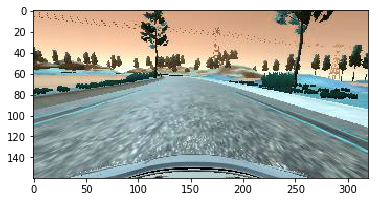

In [51]:
center_img = cv2.imread('data/IMG/center_2017_05_20_16_45_20_455.jpg')
left_img = cv2.imread('data/IMG/left_2017_05_20_16_45_20_455.jpg')
right_img = cv2.imread('data/IMG/right_2017_05_20_16_45_20_455.jpg')
process_center_img = preprocess(center_img)
process_left_img = preprocess(left_img)
modified_center_img, _ = modify_image(process_center_img, 0.0)
shadow_center_img = change_shadow(process_center_img)
brightness_center_img = change_brightness(process_center_img)
plt.imshow(center_img)

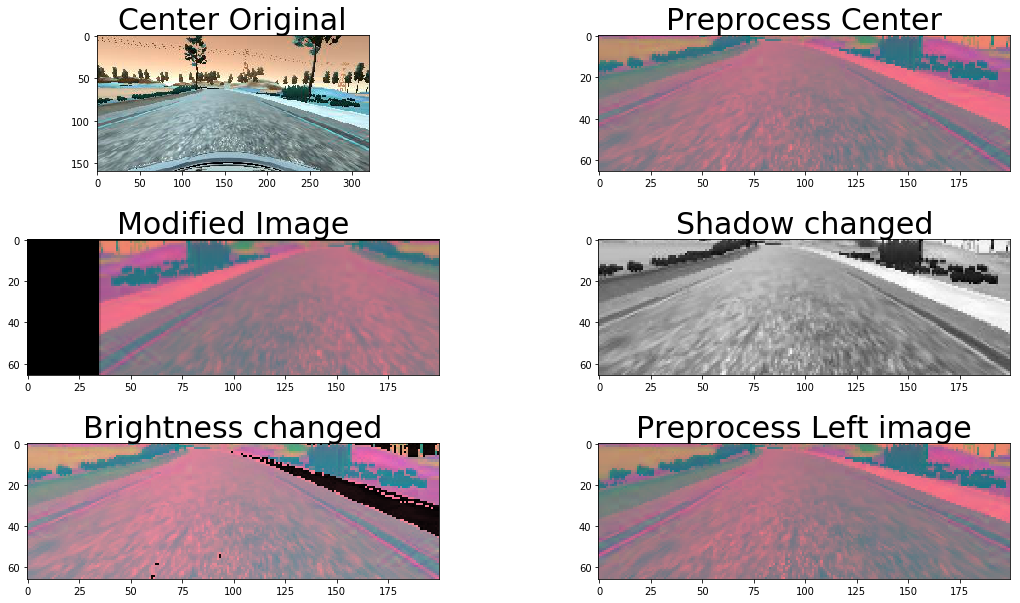

In [52]:
# Visualize transforms to create binary image
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10))
f.subplots_adjust(hspace = .5, wspace=.05)
ax1.imshow(center_img, cmap='gray')
ax1.set_title('Center Original', fontsize=30)
ax2.imshow(process_center_img, cmap='gray')
ax2.set_title('Preprocess Center', fontsize=30)
ax3.imshow(modified_center_img, cmap='gray')
ax3.set_title('Modified Image', fontsize=30)
ax4.imshow(shadow_center_img, cmap='gray')
ax4.set_title('Shadow changed', fontsize=30)
ax5.imshow(brightness_center_img, cmap='gray')
ax5.set_title('Brightness changed', fontsize=30)
ax6.imshow(process_left_img, cmap='gray')
ax6.set_title('Preprocess Left image', fontsize=30)